In [25]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [26]:
ARQUIVO_LAYOUT = "input_PNS_2019.sas"
ARQUIVO_DADOS = "PNS_2019.txt"


In [ ]:
VARIAVEIS_DESEJADAS = [
    'V0001', 'V0022', 'V0031', 'V0026', 'A00601',
    'Q068', 'C006', 'C008', 'Q002', 'Q030', 'Q060',
    'P050', 'Q092', 'W00101', 'W00201', 'I001',
    'P035', 'F00101'
]

In [28]:
dicionario_variaveis = {
        "V0001": "Unidade da Federação (UF)",
        "V0022": "Peso do morador selecionado",
        "V0031": "Região geográfica",
        "V0026": "Situação do domicílio (urbano/rural)",
        "A00601": "Forma como a água chega ao domicílio (canalizada, sem canalização etc.)",
        "Q068": "Diagnóstico médico de AVC (acidente vascular cerebral)",
        "C006": "Sexo do morador (masculino/feminino)",
        "C008": "Idade do morador (em anos)",
        "Q002": "Diagnóstico médico de hipertensão arterial",
        "Q030": "Diagnóstico médico de diabetes",
        "Q060": "Diagnóstico médico de colesterol alto",
        "P050": "Atualmente, o(a) Sr(a) fuma algum produto do tabaco",
        "Q092": "Diagnóstico médico de depressão",
        "W00101": "Peso do morador (em kg)",
        "W00201": "Altura do morador (em cm)",
        "I001": "Autoavaliação do estado de saúde (muito bom, bom, regular etc.)",
        "P035": "Prática de atividade física (tempo semanal)",
        "F00101": "Rendimento domiciliar per capita",
 }


In [ ]:
def ler_layout(nome_arquivo_layout):
    with open(nome_arquivo_layout, 'r', encoding='latin-1') as file:
        layout_content = file.read()
    regex = re.compile(r'@\s*(\d+)\s+(\w+)\s+\$?(\d+)')
    matches = regex.findall(layout_content)
    col_specs, col_names = [], []
    for start, name, width in matches:
        start, width = int(start)-1, int(width)
        col_specs.append((start, start+width))
        col_names.append(name.upper())
    return col_specs, col_names


col_specs, col_names = ler_layout(ARQUIVO_LAYOUT)

colunas_para_usar = [col for col in col_names if col in VARIAVEIS_DESEJADAS]

df = pd.read_fwf(
    ARQUIVO_DADOS,
    colspecs=[(col_specs[col_names.index(col)][0], col_specs[col_names.index(col)][1]) for col in colunas_para_usar],
    names=colunas_para_usar
)

df.rename(columns=dicionario_variaveis, inplace=True)


print("\n=== Quantidade de amostras válidas por variável ===")
print(df.count())

print("\n=== Estatísticas descritivas das variáveis numéricas ===")
display(df.describe())



=== Quantidade de amostras válidas por variável ===
Unidade da Federação (UF)                                                  293726
Peso do morador selecionado                                                279382
Situação do domicílio (urbano/rural)                                       293726
Região geográfica                                                          293726
Forma como a água chega ao domicílio (canalizada, sem canalização etc.)    279382
Sexo do morador (masculino/feminino)                                       279382
Idade do morador (em anos)                                                 279382
Frequência de consumo de feijão                                             90846
Prática de atividade física (tempo semanal)                                 36398
Atualmente, o(a) Sr(a) fuma algum produto do tabaco                         90846
Diagnóstico médico de colesterol alto                                       82881
Diagnóstico médico de problema no coração    

,Unidade da Federação (UF),Peso do morador selecionado,Situação do domicílio (urbano/rural),Região geográfica,"Forma como a água chega ao domicílio (canalizada, sem canalização etc.)",Sexo do morador (masculino/feminino),Idade do morador (em anos),Frequência de consumo de feijão,Prática de atividade física (tempo semanal),"Atualmente, o(a) Sr(a) fuma algum produto do tabaco",Diagnóstico médico de colesterol alto,Diagnóstico médico de problema no coração,Diagnóstico médico de AVC (acidente vascular cerebral),Diagnóstico médico de depressão,Peso do morador (em kg),Altura do morador (em cm)
count,293726.000000,279382.000000,293726.000000,293726.000000,279382.000000,279382.000000,279382.000000,90846.000000,36398.000000,90846.000000,82881.000000,4732.000000,90846.000000,90846.000000,6569.000000,6561.000000
mean,28.844716,3.738602,1.236843,2.589492,1.113282,1.518788,35.267651,1.599344,3.365377,2.762389,1.837466,48.487532,1.978260,1.908284,72.448531,164.151928
std,11.762108,1.727899,0.425146,1.387005,0.438858,0.499648,21.675970,0.490034,1.931954,0.636955,0.368942,19.301753,0.145834,0.288626,15.665337,10.017149
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,29.600000,119.300000
25%,21.000000,3.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,2.000000,3.000000,2.000000,38.000000,2.000000,2.000000,61.500000,157.000000
50%,27.000000,4.000000,1.000000,2.000000,1.000000,2.000000,34.000000,2.000000,3.000000,3.000000,2.000000,50.000000,2.000000,2.000000,70.500000,164.000000
75%,35.000000,5.000000,1.000000,4.000000,1.000000,2.000000,52.000000,2.000000,5.000000,3.000000,2.000000,61.250000,2.000000,2.000000,82.000000,171.200000
max,53.000000,23.000000,2.000000,4.000000,3.000000,2.000000,112.000000,2.000000,7.000000,3.000000,2.000000,96.000000,2.000000,2.000000,145.000000,195.000000


In [ ]:
dados_ausentes = df.isna().sum().sort_values(ascending=False)
percentual_ausentes = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

df_ausentes = pd.DataFrame({
    'Quantidade ausente': dados_ausentes,
    'Percentual ausente (%)': percentual_ausentes
})

print("\n=== Dados ausentes por variável ===")
display(df_ausentes)



=== Dados ausentes por variável ===


,Quantidade ausente,Percentual ausente (%)
Diagnóstico médico de problema no coração,288994,98.388975
Altura do morador (em cm),287165,97.766286
Peso do morador (em kg),287157,97.763562
Prática de atividade física (tempo semanal),257328,87.608179
Diagnóstico médico de colesterol alto,210845,71.782886
Frequência de consumo de feijão,202880,69.071175
"Atualmente, o(a) Sr(a) fuma algum produto do tabaco",202880,69.071175
Diagnóstico médico de AVC (acidente vascular cerebral),202880,69.071175
Diagnóstico médico de depressão,202880,69.071175
Peso do morador selecionado,14344,4.883463


In [ ]:
variaveis_numericas = [
    "Peso do morador selecionado", 
    "Altura do morador (em cm)",  
    "Idade do morador (em anos)",
    "Prática de atividade física (tempo semanal)",
]

def detectar_outliers_iqr(df, colunas):
    outliers_dict = {}
    for col in colunas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
        outliers_dict[col] = outliers
        print(f"\n=== {col} ===")
        print(f"Número de outliers: {outliers.shape[0]}")
        print(f"Limites: {limite_inferior:.2f} - {limite_superior:.2f}")
    return outliers_dict

outliers = detectar_outliers_iqr(df, variaveis_numericas)


=== Peso do morador selecionado ===
Número de outliers: 4457
Limites: 0.00 - 8.00

=== Altura do morador (em cm) ===
Número de outliers: 21
Limites: 135.70 - 192.50

=== Idade do morador (em anos) ===
Número de outliers: 7
Limites: -35.50 - 104.50

=== Prática de atividade física (tempo semanal) ===
Número de outliers: 0
Limites: -2.50 - 9.50


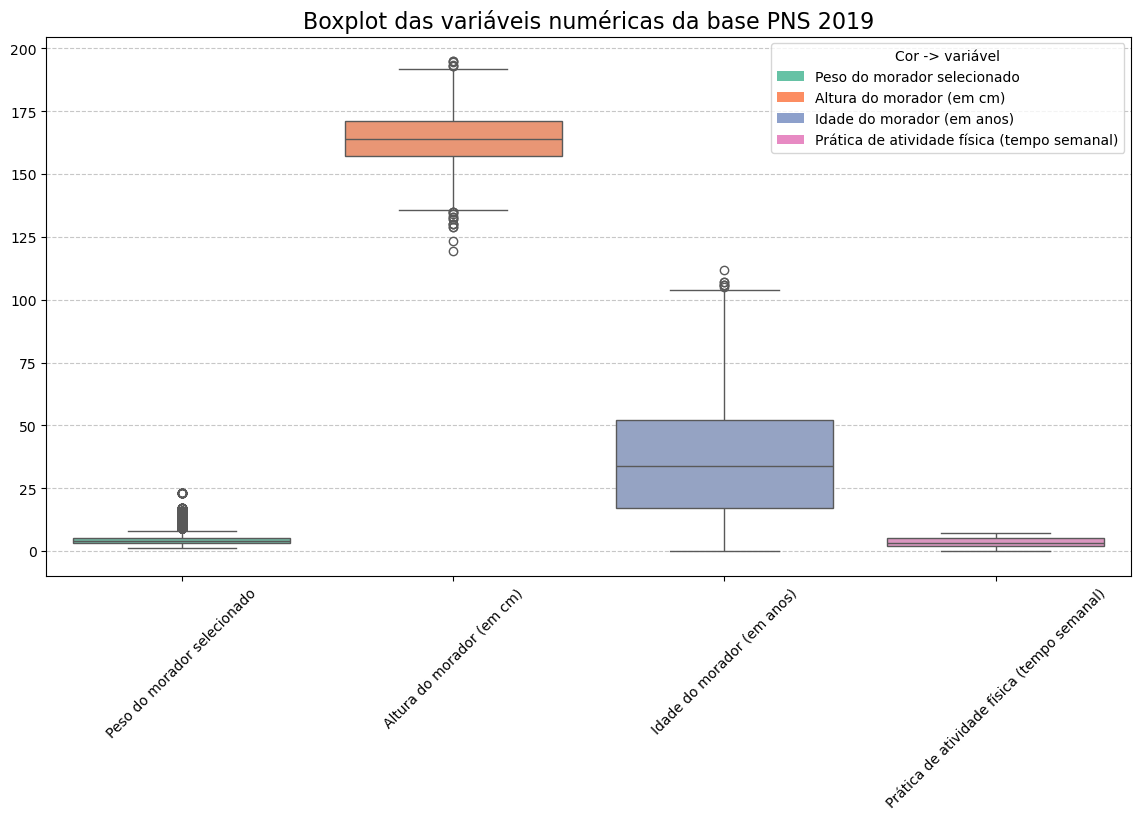

In [ ]:
variaveis_numericas = [
    "Peso do morador selecionado", 
    "Altura do morador (em cm)", 
    "Idade do morador (em anos)",
    "Prática de atividade física (tempo semanal)",
]

cores = sns.color_palette("Set2", len(variaveis_numericas))

plt.figure(figsize=(14, 7))
ax = sns.boxplot(data=df[variaveis_numericas], palette=cores)
plt.title("Boxplot das variáveis numéricas da base PNS 2019", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

from matplotlib.patches import Patch
legendas = [Patch(facecolor=cores[i], label=variaveis_numericas[i]) for i in range(len(variaveis_numericas))]
ax.legend(handles=legendas, loc='upper right', title="Cor -> variável", frameon=True)

plt.show()


In [ ]:
    # Definir a variável alvo (target)
    target = "Diagnóstico médico de AVC (acidente vascular cerebral)"

    # Converter target para numérico (caso não esteja)
    df[target] = pd.to_numeric(df[target], errors="coerce")

    # Selecionar apenas variáveis numéricas para correlação
    df_numerico = df.select_dtypes(include=[np.number])

    # Calcular correlação com a variável alvo
    correlacoes = df_numerico.corr()[target].drop(target)

    # Criar DataFrame com interpretação
    resultado_correlacao = pd.DataFrame({
        "Variável": correlacoes.index,
        "Correlação": correlacoes.values,
        "Tipo": ["Positiva" if val > 0 else "Negativa" if val < 0 else "Nula" for val in correlacoes.values]
    }).sort_values(by="Correlação", ascending=False)

    print("\n=== Correlação com a variável alvo (AVC) ===")
    print(resultado_correlacao)


=== Correlação com a variável alvo (AVC) ===
                                             Variável  Correlação      Tipo
10              Diagnóstico médico de colesterol alto    0.074825  Positiva
12                    Diagnóstico médico de depressão    0.060898  Positiva
1                         Peso do morador selecionado    0.041562  Positiva
14                          Altura do morador (em cm)    0.032799  Positiva
13                            Peso do morador (em kg)    0.005960  Positiva
9   Atualmente, o(a) Sr(a) fuma algum produto do t...    0.004944  Positiva
2                Situação do domicílio (urbano/rural)    0.004112  Positiva
4   Forma como a água chega ao domicílio (canaliza...    0.003576  Positiva
0                           Unidade da Federação (UF)    0.000695  Positiva
5                Sexo do morador (masculino/feminino)    0.000083  Positiva
3                                   Região geográfica   -0.000088  Negativa
8         Prática de atividade física (tem

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Definir variáveis categóricas de interesse
var_target = "Diagnóstico médico de AVC (acidente vascular cerebral)"
var_teste = "Idade do morador (em anos)"

# Criar tabela de contingência
tabela = pd.crosstab(df[var_target], df[var_teste])

print("\n=== Tabela de Contingência ===")
print(tabela)

# Teste do qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print("\n=== Resultado Qui-Quadrado ===")
print(f"Qui-quadrado: {chi2:.4f}")
print(f"Graus de liberdade: {dof}")
print(f"p-valor: {p:.6f}")

# Interpretação simples
if p < 0.05:
    print("➡ Existe associação significativa entre AVC e Idade.")
else:
    print("➡ Não há evidência de associação significativa entre AVC e Idade.")



=== Tabela de Contingência ===
Idade do morador (em anos)                          15.0   16.0   17.0   \
Diagnóstico médico de AVC (acidente vascular ce...                        
1.0                                                     1      0      0   
2.0                                                   706    756    852   

Idade do morador (em anos)                          18.0   19.0   20.0   \
Diagnóstico médico de AVC (acidente vascular ce...                        
1.0                                                     2      3      3   
2.0                                                   974   1042   1104   

Idade do morador (em anos)                          21.0   22.0   23.0   \
Diagnóstico médico de AVC (acidente vascular ce...                        
1.0                                                     0      3      8   
2.0                                                  1168   1209   1251   

Idade do morador (em anos)                          24.0   ...  9

In [ ]:

var_idade = "Prática de atividade física (tempo semanal)"
var_avc = "Diagnóstico médico de AVC (acidente vascular cerebral)"

bins = [29, 39, 49, 59, 69, 79, 89, np.inf]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['Faixa Etária'] = pd.cut(df[var_idade], bins=bins, labels=labels, right=False)

prop_avc = df.groupby('Faixa Etária')[var_avc].value_counts(normalize=True).unstack()
prop_avc_sim = prop_avc['Sim'] * 100 

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=prop_avc_sim.index,
    y=prop_avc_sim.values,
    palette="viridis" # Usando uma paleta de cores diferente para destacar
)

ax.set_title("Porcentagem de Diagnóstico de AVC por Faixa Etária", fontsize=16, pad=20)
ax.set_xlabel("Faixa Etária", fontsize=12)
ax.set_ylabel("Porcentagem de Casos de AVC (%)", fontsize=12)
ax.bar_label(ax.containers[0], fmt='%.2f%%') # Adiciona o valor % em cima de cada barra

plt.tight_layout()
plt.savefig("proporcao_idade_avc.png", dpi=300)

print("Novo gráfico de proporção salvo como 'proporcao_idade_avc.png'")


ValueError: Bin labels must be one fewer than the number of bin edges

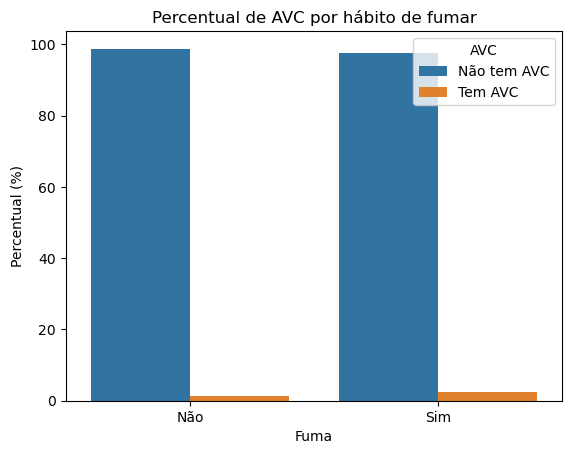

In [ ]:
df_plot = df.copy()

df_plot["Fuma"] = df_plot["Atualmente, o(a) Sr(a) fuma algum produto do tabaco"].map({
    1: "Sim",
    2: "Não"
})

df_plot["AVC"] = df_plot["Diagnóstico médico de AVC (acidente vascular cerebral)"].map({
    1: "Tem AVC",
    2: "Não tem AVC"
})

(
    df_plot.groupby("Fuma")["AVC"]
    .value_counts(normalize=True)
    .rename("Percentual")
    .mul(100)
    .reset_index()
    .pipe((sns.barplot, "data"), x="Fuma", y="Percentual", hue="AVC")
)

plt.title("Percentual de AVC por hábito de fumar")
plt.ylabel("Percentual (%)")
plt.show()


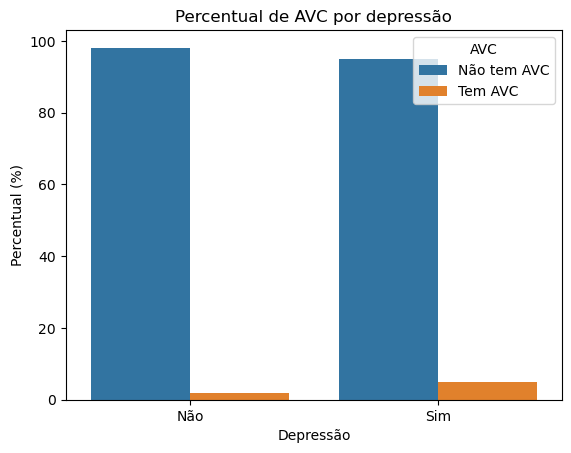

In [ ]:
df_plot = df.copy()

df_plot["Depressão"] = df_plot["Diagnóstico médico de depressão"].map({
    1: "Sim",
    2: "Não"
})

df_plot["AVC"] = df_plot["Diagnóstico médico de AVC (acidente vascular cerebral)"].map({
    1: "Tem AVC",
    2: "Não tem AVC"
})

(
    df_plot.groupby("Depressão")["AVC"]
    .value_counts(normalize=True)
    .rename("Percentual")
    .mul(100)
    .reset_index()
    .pipe((sns.barplot, "data"), x="Depressão", y="Percentual", hue="AVC")
)

plt.title("Percentual de AVC por depressão")
plt.ylabel("Percentual (%)")
plt.show()


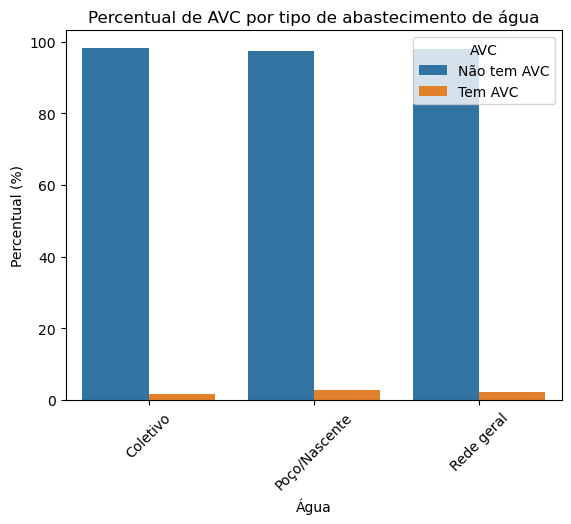

In [ ]:
df_plot = df.copy()

df_plot["Água"] = df_plot["Forma como a água chega ao domicílio (canalizada, sem canalização etc.)"].map({
    1: "Rede geral",
    2: "Poço/Nascente",
    3: "Coletivo",
    4: "Cisterna",
    5: "Outra",
    9: "Ignorado"
})

df_plot["AVC"] = df_plot["Diagnóstico médico de AVC (acidente vascular cerebral)"].map({
    1: "Tem AVC",
    2: "Não tem AVC"
})

(
    df_plot.groupby("Água")["AVC"]
    .value_counts(normalize=True)
    .rename("Percentual")
    .mul(100)
    .reset_index()
    .pipe((sns.barplot, "data"), x="Água", y="Percentual", hue="AVC")
)

plt.title("Percentual de AVC por tipo de abastecimento de água")
plt.ylabel("Percentual (%)")
plt.xticks(rotation=45)
plt.show()


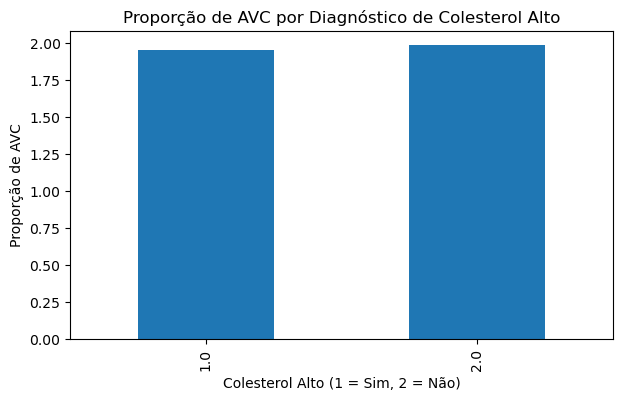

In [ ]:
import matplotlib.pyplot as plt

df_plot = df.groupby("Diagnóstico médico de colesterol alto")["Diagnóstico médico de AVC (acidente vascular cerebral)"].mean()

df_plot.plot(kind="bar", figsize=(7,4))
plt.title("Proporção de AVC por Diagnóstico de Colesterol Alto")
plt.xlabel("Colesterol Alto (1 = Sim, 2 = Não)")
plt.ylabel("Proporção de AVC")
plt.show()


=== Rede Neural (MLP) ===
Acurácia: 0.9781507980187122
              precision    recall  f1-score   support

         1.0       0.25      0.00      0.01       395
         2.0       0.98      1.00      0.99     17775

    accuracy                           0.98     18170
   macro avg       0.61      0.50      0.50     18170
weighted avg       0.96      0.98      0.97     18170



C:\Users\Iury\AppData\Local\Temp\ipykernel_13876\589457002.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x="Modelo", y="Acurácia", palette="viridis")


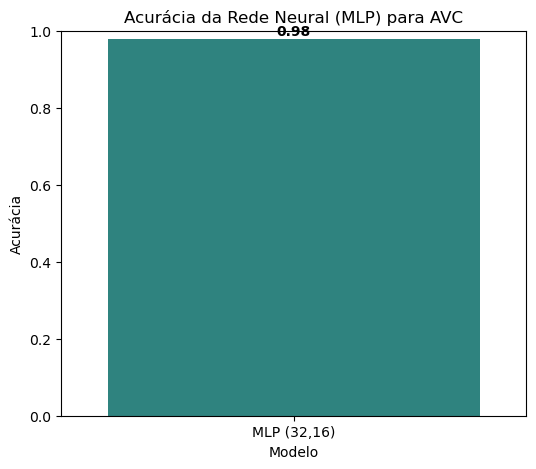

In [ ]:
target = 'Diagnóstico médico de AVC (acidente vascular cerebral)'
features = df.columns.tolist()
features.remove(target)

df = df.dropna(subset=[target])

X = df[features]
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(32,16),
    activation='relu',
    solver='adam',
    max_iter=800,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

acc_mlp = accuracy_score(y_test, y_pred)
print("=== Rede Neural (MLP) ===")
print("Acurácia:", acc_mlp)
print(classification_report(y_test, y_pred))


resultados = {
    "Modelo": ["MLP (32,16)"],
    "Acurácia": [acc_mlp]
}
df_resultados = pd.DataFrame(resultados)

plt.figure(figsize=(6,5))
sns.barplot(data=df_resultados, x="Modelo", y="Acurácia", palette="viridis")
plt.text(0, acc_mlp + 0.01, f"{acc_mlp:.2f}", ha='center', fontsize=10, fontweight='bold')
plt.title("Acurácia da Rede Neural (MLP) para AVC", fontsize=12)
plt.ylabel("Acurácia")
plt.ylim(0, 1.0)
plt.show()


=== Rede Neural (MLP) com SMOTE ===
Acurácia: 0.9239405613648872
              precision    recall  f1-score   support

         1.0       0.08      0.22      0.11       395
         2.0       0.98      0.94      0.96     17775

    accuracy                           0.92     18170
   macro avg       0.53      0.58      0.54     18170
weighted avg       0.96      0.92      0.94     18170



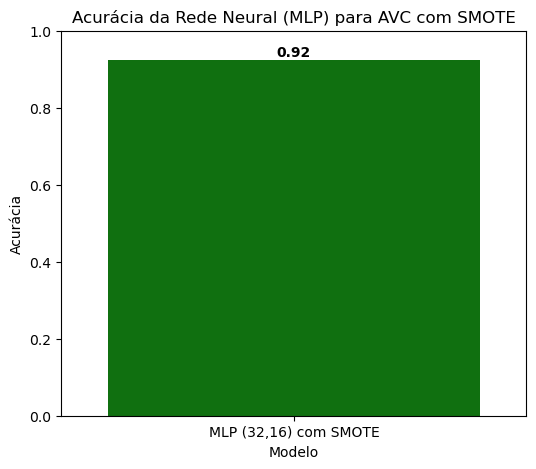

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

target = 'Diagnóstico médico de AVC (acidente vascular cerebral)'
features = df.columns.tolist()
features.remove(target)

df = df.dropna(subset=[target])

X = df[features]
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(32,16),
    activation='relu',
    solver='adam',
    max_iter=800,
    random_state=42
)
mlp.fit(X_train_scaled, y_train_res)

y_pred = mlp.predict(X_test_scaled)

acc_mlp = accuracy_score(y_test, y_pred)
print("=== Rede Neural (MLP) com SMOTE ===")
print("Acurácia:", acc_mlp)
print(classification_report(y_test, y_pred))

resultados = {
    "Modelo": ["MLP (32,16) com SMOTE"],
    "Acurácia": [acc_mlp]
}
df_resultados = pd.DataFrame(resultados)




In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Q068"], y=df["F00101"])
plt.title("Renda per capita por diagnóstico de AVC")
plt.xlabel("Diagnóstico de AVC (1=Sim, 2=Não)")
plt.ylabel("Renda per capita")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["F00101"], y=df["Q068"])
plt.title("Renda vs AVC (aparente correlação espúria)")
plt.xlabel("Renda per capita")
plt.ylabel("AVC")
plt.show()


In [31]:
from scipy.stats import chi2_contingency
import pandas as pd

# Definir variáveis categóricas de interesse
var_target = "Diagnóstico médico de AVC (acidente vascular cerebral)"
var_teste = "Idade do morador (em anos)"

# Criar tabela de contingência
tabela = pd.crosstab(df[var_target], df[var_teste])

print("\n=== Tabela de Contingência ===")
print(tabela)

# Teste do qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print("\n=== Resultado Qui-Quadrado ===")
print(f"Qui-quadrado: {chi2:.4f}")
print(f"Graus de liberdade: {dof}")
print(f"p-valor: {p:.6f}")

# Interpretação simples
if p < 0.05:
    print("➡ Existe associação significativa entre AVC e Idade.")
else:
    print("➡ Não há evidência de associação significativa entre AVC e Idade.")


NameError: name 'df' is not defined

In [24]:
print(df.columns.tolist())



NameError: name 'df' is not defined

In [ ]:
VARIAVEIS_DESEJADAS = [
    'Unidade da Federação (UF)',
    'Situação do domicílio (urbano/rural)',
    'Região geográfica',
    'Forma como a água chega ao domicílio (canalizada, sem canalização etc.)',
    'Sexo do morador (masculino/feminino)',
    'Idade do morador (em anos)',
    'Diagnóstico médico de colesterol alto',
    'Diagnóstico médico de problema no coração',
    'Diagnóstico médico de depressão',
    'Peso do morador (em kg)',
    'Altura do morador (em cm)',
    'Prática de atividade física (tempo semanal)',
    'Frequência de consumo de feijão'
]


X = df[VARIAVEIS_DESEJADAS]
y = df['Diagnóstico médico de AVC (acidente vascular cerebral)']  # variável alvo

X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)


print("=== KNN ===")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("\n=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


=== KNN ===
Acurácia: 0.8823529411764706
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.88      1.00      0.94        30

    accuracy                           0.88        34
   macro avg       0.44      0.50      0.47        34
weighted avg       0.78      0.88      0.83        34


=== Regressão Logística ===
Acurácia: 0.8823529411764706
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.88      1.00      0.94        30

    accuracy                           0.88        34
   macro avg       0.44      0.50      0.47        34
weighted avg       0.78      0.88      0.83        34



c:\Users\Iury\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Iury\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Iury\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Iury\anaconda3\Lib\site-packages\s

In [ ]:
x = df[['Unidade da Federação (UF)', 'Situação do domicílio (urbano/rural)',
        'Região geográfica', 'Sexo do morador (masculino/feminino)',
        'Idade do morador (em anos)', 'Frequência de consumo de feijão',
        'Prática de atividade física (tempo semanal)',
        'Diagnóstico médico de colesterol alto',
        'Diagnóstico médico de problema no coração',
        'Peso do morador (em kg)', 'Altura do morador (em cm)']]

y = df['Diagnóstico médico de AVC (acidente vascular cerebral)']

X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== KNN com SMOTE ===")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("\n=== Regressão Logística com SMOTE ===")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


=== KNN com SMOTE ===
Acurácia: 0.95
              precision    recall  f1-score   support

         1.0       0.92      1.00      0.96        23
         2.0       1.00      0.88      0.94        17

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40


=== Regressão Logística com SMOTE ===
Acurácia: 0.675
              precision    recall  f1-score   support

         1.0       0.75      0.65      0.70        23
         2.0       0.60      0.71      0.65        17

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.69      0.68      0.68        40



C:\Users\Iury\AppData\Local\Temp\ipykernel_13908\674172162.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x="Modelo", y="Acurácia", palette="viridis")


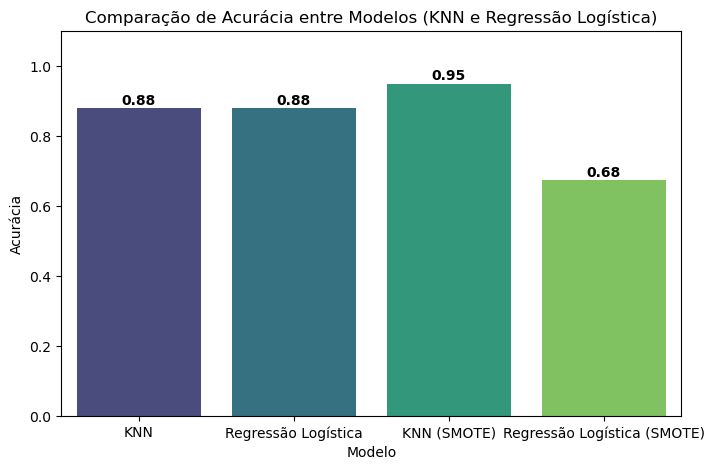

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

resultados = {
    "Modelo": ["KNN", "Regressão Logística", "KNN (SMOTE)", "Regressão Logística (SMOTE)"],
    "Acurácia": [0.88, 0.88, 0.95, 0.675]
}

df_resultados = pd.DataFrame(resultados)

plt.figure(figsize=(8,5))
sns.barplot(data=df_resultados, x="Modelo", y="Acurácia", palette="viridis")

for i, valor in enumerate(df_resultados["Acurácia"]):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.title("Comparação de Acurácia entre Modelos (KNN e Regressão Logística)", fontsize=12)
plt.ylabel("Acurácia")
plt.ylim(0, 1.1)
plt.show()


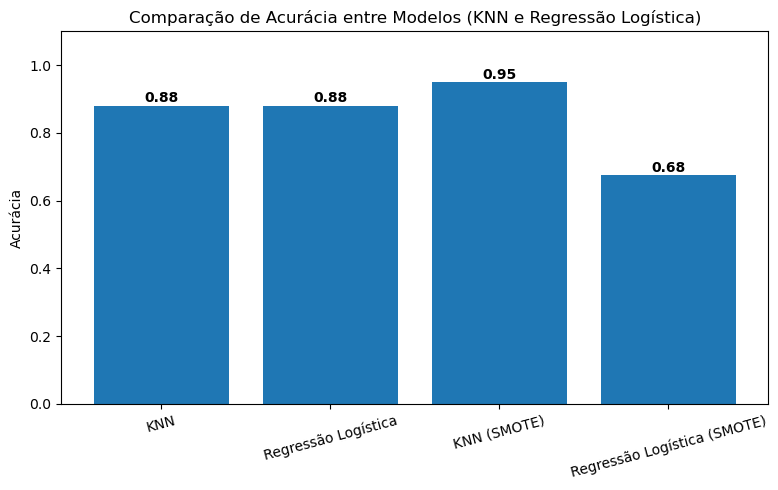

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Resultados
df = pd.DataFrame({
    "Modelo": ["KNN", "Regressão Logística", "KNN (SMOTE)", "Regressão Logística (SMOTE)"],
    "Acurácia": [0.88, 0.88, 0.95, 0.675]
})

# Gráfico
plt.figure(figsize=(8, 5))
plt.bar(df["Modelo"], df["Acurácia"])

# Rótulos
for i, v in enumerate(df["Acurácia"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10, fontweight="bold")

plt.title("Comparação de Acurácia entre Modelos (KNN e Regressão Logística)", fontsize=12)
plt.ylabel("Acurácia")
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df[['Unidade da Federação (UF)', 'Situação do domicílio (urbano/rural)',
        'Região geográfica', 'Sexo do morador (masculino/feminino)',
        'Idade do morador (em anos)', 'Frequência de consumo de feijão',
        'Prática de atividade física (tempo semanal)',
        'Diagnóstico médico de colesterol alto',
        'Diagnóstico médico de problema no coração',
        'Peso do morador (em kg)', 'Altura do morador (em cm)']]

y = df['Diagnóstico médico de AVC (acidente vascular cerebral)']

X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== KNN com SMOTE ===")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("\n=== Regressão Logística com SMOTE ===")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),  
    activation='relu',
    solver='adam',
    max_iter=800,
    random_state=42
)

mlp.fit(X_train_scaled, y)

# --- PREVISÃO ---
y_pred_mlp = mlp.predict(X_test_scaled)

# --- RESULTADOS ---
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("=== Rede Neural (MLP) ===")
print("Acurácia:", acc_mlp)
print(classification_report(y_test, y_pred_mlp))


NameError: name 'X' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

target = "Diagnóstico médico de AVC (acidente vascular cerebral)"

y = df[target]
X = df.drop(columns=[target])

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=800, random_state=42)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Pred: Não AVC", "Pred: AVC"],
            yticklabels=["Real: Não AVC", "Real: AVC"])
plt.title("Matriz de Confusão — Rede Neural (com SMOTE)")
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.show()


Calculando a matriz de correlação de TODAS as variáveis presentes no dataset original...


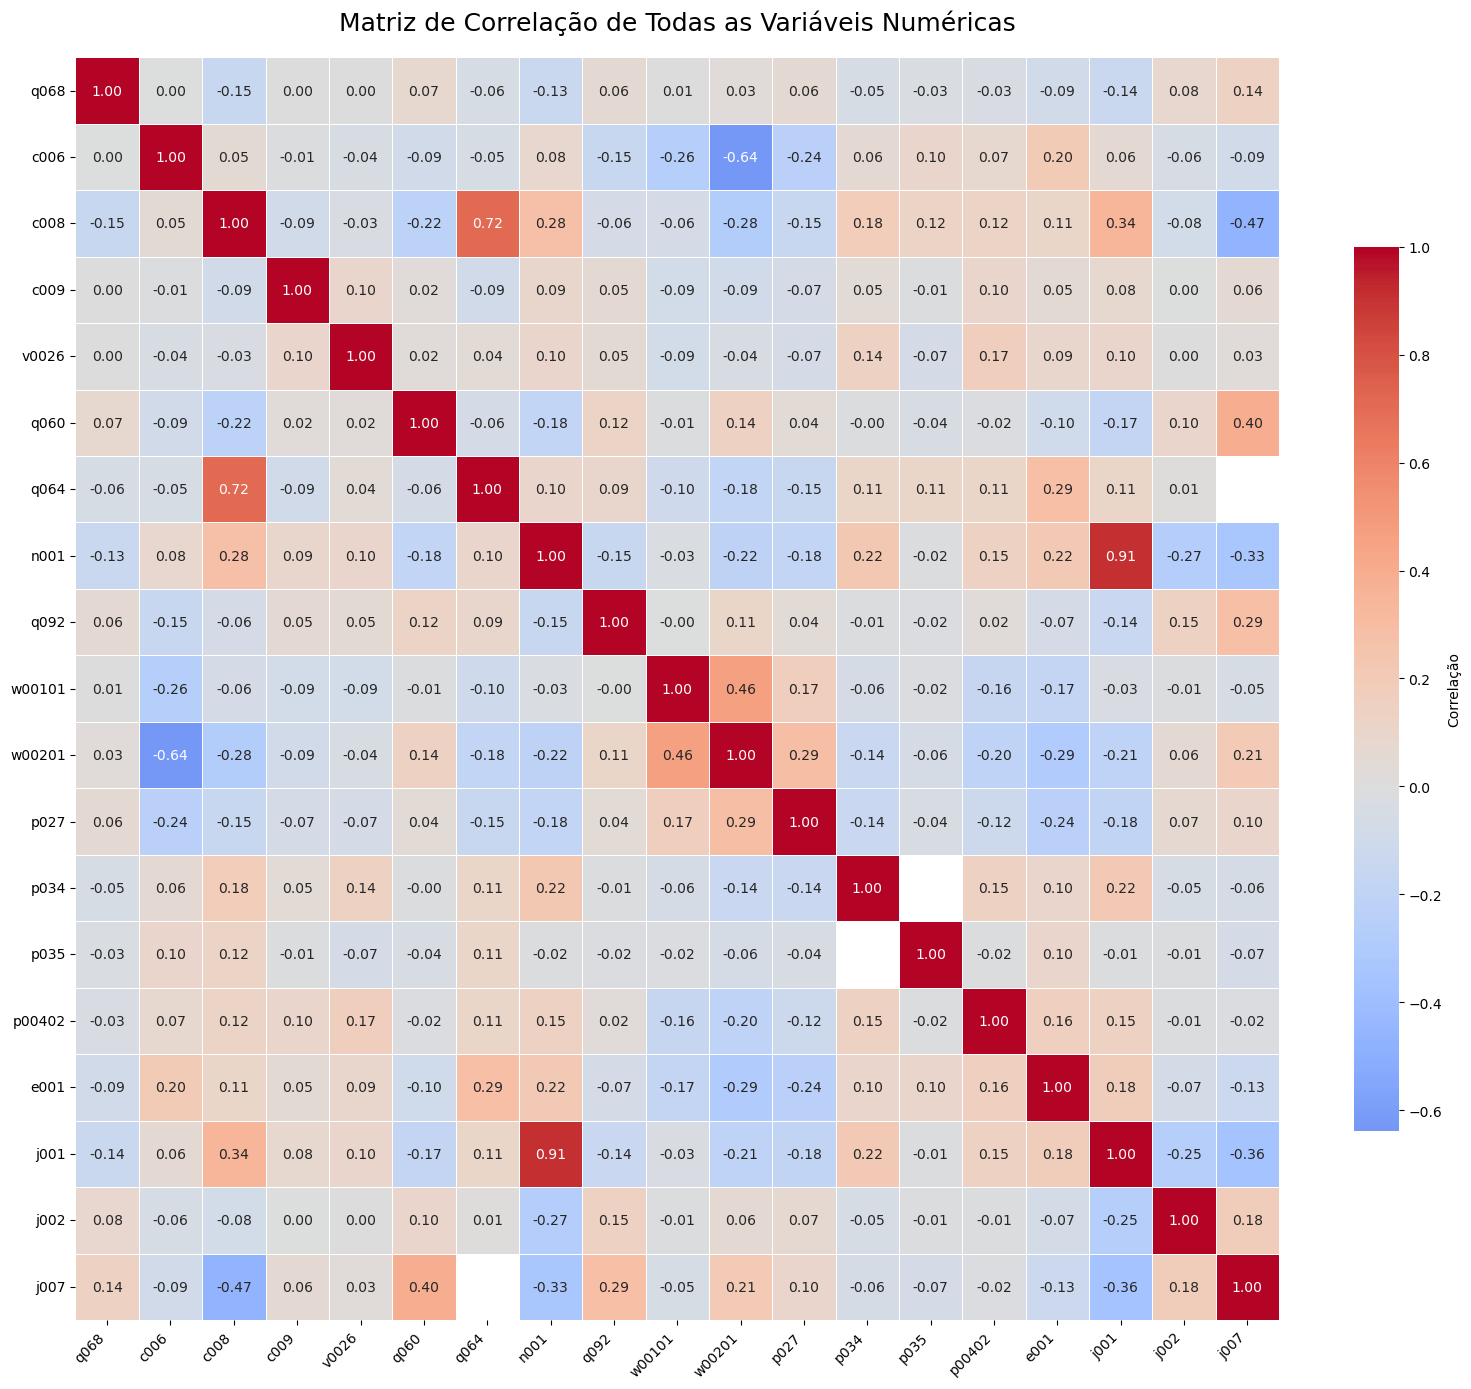